<a href="https://colab.research.google.com/github/akashraj99/akashraj99.github.io/blob/master/BTP_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,losses,optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
arr = ["Akash","ayush","sumit"]
dataset = []

for name in arr:
  fileName = os.getcwd() + "/drive/My Drive/BTP/" + name + ".npy"
  data = np.load(fileName, allow_pickle="TRUE")
  dataset.append(data)

dataset = np.array(dataset)
dataset = np.reshape(dataset,(1050,2))
random.shuffle(dataset)

In [4]:
XTrain = []
YTrain = []
XTest = []
YTest = []
for i in range(1000):
  XTrain.append(np.reshape(dataset[i][0],(100,100,100)))
  YTrain.append(dataset[i][1])
for j in range(50):
  k = 1000 + j
  XTest.append(np.reshape(dataset[k][0],(100,100,100)))
  YTest.append(dataset[k][1])
XTrain = np.asarray(XTrain, dtype=np.float32)
YTrain = np.asarray(YTrain, dtype=np.float32)
XTest = np.asarray(XTest, dtype=np.float32)
YTest = np.asarray(YTest, dtype=np.float32)

In [7]:
def create3DModel(outputSize):
  model = keras.Sequential()
  model.add(layers.Conv3D(32, kernel_size=(3, 3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(100,100,100,1)))
  model.add(layers.MaxPooling3D(pool_size=(3, 3, 3)))
  model.add(layers.Conv3D(64, kernel_size=(3, 3, 3), activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling3D(pool_size=(3, 3, 3)))
  model.add(layers.Conv3D(32, kernel_size=(3, 3, 3), activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling3D(pool_size=(3, 3, 3)))
  model.add(layers.Flatten())
  model.add(layers.Dense(60, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dense(outputSize, activation = "softmax"))
  return model

In [9]:
def create2DModel(outputSize):
  model = keras.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(100,100,100)))
  model.add(layers.MaxPooling2D(pool_size=(3, 3)))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D(pool_size=(3, 3)))
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D(pool_size=(3, 3)))
  model.add(layers.Flatten())
  model.add(layers.Dense(60, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dense(outputSize, activation = "softmax"))
  return model

In [6]:
def Train(model,xTrain,yTrain,batchSize,epochs,split):
 	history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epochs, validation_split=split)
 	return history

In [7]:
def Test(model,xTest,yTest):
  score = model.evaluate(xTest,yTest)
  return score

In [10]:
md = create2DModel(7)
md.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        28832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)              

In [11]:
md.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [12]:
progress = Train(md,XTrain,YTrain,100,5,0.1)
score = Test(md,XTest,YTest)

Epoch 1/5
9/9 [==============================] - 48s 5s/step - loss: 1.6962 - accuracy: 0.3587 - val_loss: 1.4183 - val_accuracy: 0.4400
Epoch 2/5
9/9 [==============================] - 46s 5s/step - loss: 0.9241 - accuracy: 0.6940 - val_loss: 1.0003 - val_accuracy: 0.6100
Epoch 3/5
9/9 [==============================] - 46s 5s/step - loss: 0.3834 - accuracy: 0.8944 - val_loss: 0.7726 - val_accuracy: 0.7800
Epoch 4/5
9/9 [==============================] - 46s 5s/step - loss: 0.1989 - accuracy: 0.9560 - val_loss: 0.7118 - val_accuracy: 0.8100
Epoch 5/5
2/2 [==============================] - 1s 238ms/step - loss: 0.7644 - accuracy: 0.7200


In [13]:
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.7643583416938782 / Test accuracy: 0.7200000286102295


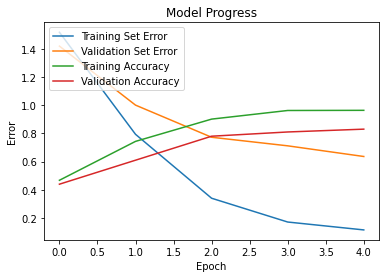

In [20]:
plt.plot(progress.history['loss'], label='Training Set Error')
plt.plot(progress.history['val_loss'], label='Validation Set Error')
plt.plot(progress.history['accuracy'], label='Training Accuracy')
plt.plot(progress.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Progress')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()